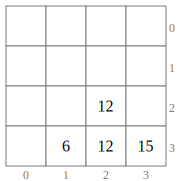

In [3]:
import random
import algviz
# Create a visualizer object.
# The default duration of each frame of animation is 0.2 second.
# The interval between two frames of animation is 0.1 seconds.
viz = algviz.Visualizer(delay=0.2, wait=0.1)

viz.display()               # Display the firt animation frame.
# Do something...
viz.display(delay=1.0)      # Display the second animation frame.

maxDepth = 4                    # Sets the maximum number of rows
curLength = 1                   # Keeps track of the length of the skiplist (number of cols)

def decide_depth():             # Decide depth of a new column
    curDepth = 1
    for x in range(1, maxDepth):  # Each level has a 50% chance of going higher. So there is an overall 25% chance of reaching the third level (2nd index)
        if random.choice([0, 1]) == 0:
            break
        else:
            curDepth += 1
    return curDepth

tab = viz.createTable(
    row=maxDepth,             # The table has maxDepth rows.
    col=1,                    # The table has 3 columns
    data=None,                # The initial data in table.
    name="Table",             # The name of table.
    cell_size=(40, 40),       # The table cell (width, height).
    show_index=True           # Whether to display subscripts.
)
viz.display()

def find_next_x_index(x, y, curInt):
    reached_limit = False   # Used to ensure we flash ONLY the first index with (value > x) light_blue.
    for i in range(x, curLength):
        if i == 0:
            tab.mark(algviz.color_red, y, x)
            viz.display()
            tab.removeMark(algviz.color_red)
            viz.display()
        if tab[y][i] != None:
            if tab[y][i] <= curInt:
                x = i
                tab.mark(algviz.color_red, y, x)
                viz.display()
                tab.removeMark(algviz.color_red)
                viz.display()
            elif not reached_limit:
                tab.mark(algviz.color_light_blue, y, i)
                viz.display()
                tab.removeMark(algviz.color_light_blue)
                viz.display()
                reached_limit = True
    return x

def insert_new_val(x, curInt):
    j = decide_depth()
    for y in reversed(range(0, maxDepth)):
        tab[y][x] = None
    for y in reversed(range(maxDepth-j, maxDepth)):
        tab[y][x] = curInt
        tab.mark(algviz.color_green, y, x)
    viz.display()
    for y in reversed(range(maxDepth-j, maxDepth)):
        tab.removeMark(algviz.color_green)
    viz.display()

curAction = '_placeholder_'     # Will become insert, delete, search, or done
while curAction != 'done':
    curAction = input('Enter \'insert\', \'delete\', \'search\', or \'done\':' )

    if curAction == 'insert':
        print('You said insert...')
        curInput = input('Enter an integer: ')  # String value from user input
        curInt = -1                             # Will be replaced with the value of the integer, if input is valid
        try:                                    # Make sure input is valid. Otherwise, start over.
        # Convert it into integer
            curInt = int(curInput)
        except ValueError:
            print('\'', curInput, '\' is not a valid integer...')
            continue

        if curLength == 1:
            tab.reshape(row=maxDepth, col=2)
            curLength += 1
            insert_new_val(1, curInt)
        else:
            x = 0
            for y in range(maxDepth):
                x = find_next_x_index(x, y,curInt)
            # We have now found our x index. Resize, copy, and add.
            tab.reshape(row=maxDepth, col=curLength+1)
            curLength += 1
            if tab[maxDepth-1][x] == None:      # If element is lowest
                for i in reversed(range(x, curLength-1)):
                    for j in range(maxDepth):
                        tab[j][i+1] = tab[j][i]
                insert_new_val(1, curInt)
                viz.display()
            elif curInt > tab[maxDepth-1][x] and x==curLength-2:   # If element is highest
                insert_new_val(x+1, curInt)
                viz.display()
            else:                               # If element is somewhere in the middle
                for i in reversed(range(x, curLength-1)):
                    for j in range(maxDepth):
                        tab[j][i+1] = tab[j][i]
                insert_new_val(x+1, curInt)
                viz.display()

    elif curAction == 'delete':
        curInput = input('Enter an integer: ')  # String value from user input
        curInt = -1                             # Will be replaced with the value of the integer, if input is valid
        try:                                    # Make sure input is valid. Otherwise, start over.
        # Convert it into integer
            curInt = int(curInput)
        except ValueError:
            print('\'', curInput, '\' is not a valid integer...')
            continue

        if curLength == 1:
            print("No values to search")
            for n in range(3):
                for j in range(maxDepth):
                    tab.mark(algviz.color_red, j, 0)
                viz.display()
                for j in range(maxDepth):
                    tab[j][0] = 0                   # necessary because of bug in the library
                    tab.removeMark(algviz.color_red)
                    tab[j][0] = None
                viz.display()
        else:
            x = 0
            for y in range(maxDepth):
                x = find_next_x_index(x, y,curInt)
            if tab[maxDepth-1][x] == None:      # If too low
                for n in range(3):
                    for j in range(maxDepth):
                        tab.mark(algviz.color_red, j, 0)
                    viz.display()
                    for j in range(maxDepth):
                        tab[j][0] = 0                   # necessary because of bug in the library
                        tab.removeMark(algviz.color_red)
                        tab[j][0] = None
                    viz.display()
            elif curInt > tab[maxDepth-1][x] and x==curLength-1:   # If too high
                for n in range(3):
                    for j in range(maxDepth):
                        tab.mark(algviz.color_red, j, x)
                    viz.display()
                    for j in range(maxDepth):
                        tab[j][0] = 0                   # necessary because of bug in the library
                        tab.removeMark(algviz.color_red)
                        tab[j][0] = None
                    viz.display()
            else:                               # If element is found somewhere in the middle
                if tab[maxDepth-1][x] == curInt:
                    for n in range(3):
                        for j in range(maxDepth):
                            if tab[j][x] != None:
                                tab.mark(algviz.color_blue, j, x)
                        viz.display()
                        tab.removeMark(algviz.color_blue)
                        viz.display()
                    for j in range(maxDepth):
                        for i in range(x, curLength-1):
                            tab[j][i] = tab[j][i+1]
                    tab.reshape(row=maxDepth, col=curLength-1)
                    viz.display()
                    curLength -= 1
                    
                else:
                    for n in range(3):
                        for j in range(maxDepth):
                            tab.mark(algviz.color_red, j, x)
                        viz.display()
                        tab.removeMark(algviz.color_red)
                        viz.display()


    elif curAction == 'search':
        curInput = input('Enter an integer: ')  # String value from user input
        curInt = -1                             # Will be replaced with the value of the integer, if input is valid
        try:                                    # Make sure input is valid. Otherwise, start over.
        # Convert it into integer
            curInt = int(curInput)
        except ValueError:
            print('\'', curInput, '\' is not a valid integer...')
            continue

        if curLength == 1:
            print("No values to search")
            for n in range(3):
                for j in range(maxDepth):
                    tab.mark(algviz.color_red, j, 0)
                viz.display()
                for j in range(maxDepth):
                    tab[j][0] = 0                   # necessary because of bug in the library
                    tab.removeMark(algviz.color_red)
                    tab[j][0] = None
                viz.display()
        else:
            x = 0
            for y in range(maxDepth):
                x = find_next_x_index(x, y,curInt)
            if tab[maxDepth-1][x] == None:      # If too low
                for n in range(3):
                    for j in range(maxDepth):
                        tab.mark(algviz.color_red, j, 0)
                    viz.display()
                    for j in range(maxDepth):
                        tab[j][0] = 0                   # necessary because of bug in the library
                        tab.removeMark(algviz.color_red)
                        tab[j][0] = None
                    viz.display()
            elif curInt > tab[maxDepth-1][x] and x==curLength-1:   # If too high
                for n in range(3):
                    for j in range(maxDepth):
                        tab.mark(algviz.color_red, j, x)
                    viz.display()
                    for j in range(maxDepth):
                        tab[j][0] = 0                   # necessary because of bug in the library
                        tab.removeMark(algviz.color_red)
                        tab[j][0] = None
                    viz.display()
            else:                               # If element is found somewhere in the middle
                if tab[maxDepth-1][x] == curInt:
                    for n in range(3):
                        for j in range(maxDepth):
                            if tab[j][x] != None:
                                tab.mark(algviz.color_blue, j, x)
                        viz.display()
                        tab.removeMark(algviz.color_blue)
                        viz.display()
                else:
                    for n in range(3):
                        for j in range(maxDepth):
                            tab.mark(algviz.color_red, j, x)
                        viz.display()
                        tab.removeMark(algviz.color_red)
                        viz.display()

    elif curAction == 'done':
        print('You said done...')
    else:
        print("INVALID INPUT! Try again...")